## Imports

In [5]:
from ultralytics import YOLO
import os
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, recall_score, precision_score, ConfusionMatrixDisplay
import torch
#import cuda
import matplotlib.pyplot as plt
from typing import Union

## Testing CUDA

In [23]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')
torch.cuda.device_count()

Using device: cuda


1

## Running object detection code

In [24]:
modelDir = "best.pt"
sourceImgDir = r"C:\Users\engli\Documents\School Stuff\Y2S1\NPSC2001\images\test"
#sourceImgDir = "./images"
csvName = "output.csv"

In [25]:
try:
    images = os.listdir(sourceImgDir)
except FileNotFoundError as e:
    print(e)

In [26]:
images

['002a34c58c5b758217ed1f584ccbcfe9.png',
 '004f33259ee4aef671c2b95d54e4be68.png',
 '008bdde2af2462e86fd373a445d0f4cd.png',
 '009bc039326338823ca3aa84381f17f1.png',
 '00a2145de1886cb9eb88869c85d74080.png',
 '00b7e6bfa4dc1fe9ddd0ce74743e38c2.png',
 '011295e0bcdc7636569ab73bfdcc4450.png',
 '013c169f9dad6f1f6485da961b9f7bf2.png',
 '01431a2618c0ace741e4e270a37e20b9.png',
 '0168eb925aa6f28a78b16134792f5d0e.png',
 '016bc723c3ceedb78e27ebfe7032498e.png',
 '0171021638f9272a34a41feb84ed47a0.png',
 '019df578e38053e614d483f7fb347b26.png',
 '01ded16689539deb30d0981fafd18465.png',
 '01eb30a37b6f5fed8a8d3ab2d1c0a7d6.png',
 '01f8f17dba6c5e67ba5bcf30ce70ea3f.png',
 '02199417ff2a400cff64249f0399f0d7.png',
 '022a62478444fedf2dea1ba91aafdc48.png',
 '02425334e92510da663eb913ad0632ea.png',
 '024e693014e70d448f650267bed661ae.png',
 '0271d381c3e88527721efcfaf518be71.png',
 '0291515f5d14c34180a15712a55bf7bd.png',
 '02b0ad6e22487b7e3f08093c42444b0f.png',
 '02d04b6b6883fd92c12a3dde5d2ff6c0.png',
 '034814210bf210

In [27]:
model = YOLO(modelDir)

In [28]:
resultsList = []
for image in images:
    imgDir = os.path.join(sourceImgDir, image)
    results = model.predict(
        source = imgDir,
        imgsz = 1024,
        conf = 0,
        iou = 0.6,
        max_det = 1,
        device = "cuda:0"
    )
    image_id = [image[:-4]]
    
    for r in results:
        conf = r.boxes.conf.tolist()
        box = r.boxes.xyxy.tolist()
        if box:
            resultsList.append(image_id + box[0] + conf)


image 1/1 C:\Users\engli\Documents\School Stuff\Y2S1\NPSC2001\images\test\002a34c58c5b758217ed1f584ccbcfe9.png: 1024x1024 1 Cardiomegaly, 78.4ms
Speed: 6.0ms preprocess, 78.4ms inference, 33.6ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 C:\Users\engli\Documents\School Stuff\Y2S1\NPSC2001\images\test\004f33259ee4aef671c2b95d54e4be68.png: 1024x1024 1 Cardiomegaly, 73.5ms
Speed: 5.0ms preprocess, 73.5ms inference, 22.1ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 C:\Users\engli\Documents\School Stuff\Y2S1\NPSC2001\images\test\008bdde2af2462e86fd373a445d0f4cd.png: 1024x1024 1 Cardiomegaly, 72.6ms
Speed: 5.0ms preprocess, 72.6ms inference, 27.0ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 C:\Users\engli\Documents\School Stuff\Y2S1\NPSC2001\images\test\009bc039326338823ca3aa84381f17f1.png: 1024x1024 1 Cardiomegaly, 67.4ms
Speed: 4.1ms preprocess, 67.4ms inference, 32.1ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 C:\Us

In [2]:
df = pd.DataFrame(resultsList, columns = ["image_id", "x_min", "y_min", "x_max", "y_max", "conf"])
df.to_csv(csvName, sep = ",", index = None)

NameError: name 'pd' is not defined

In [6]:
#importing df

df = pd.read_csv("output.csv")

## Comparing and cleaning against ground truth

In [8]:
groundTruth = pd.read_csv(r"/Users/kaichenchai/Documents/Y2S1/NPSC2001/Mini_VinDr_CXR_Dataset/subset/c-subset/mergedTest.csv")

In [9]:
groundTruth

,image_id,class_name,x_min,y_min,x_max,y_max
0,e0dc2e79105ad93532484e956ef8a71a,Cardiomegaly,328.257771,554.673173,819.965088,820.039027
1,42da2c134b53cb5594774d3d29faac59,Cardiomegaly,304.821814,495.098180,840.552539,719.683986
2,c7179539654a1b3b7977e56e7e3009d5,Cardiomegaly,285.719686,509.770654,727.643238,730.732429
3,40497da14aafc428210b623fc8445288,Cardiomegaly,377.327945,636.684680,845.837598,842.275413
4,91123b24b8a4c289820bbb2dc6dabdfe,Cardiomegaly,377.604606,559.853055,836.684550,728.742221
...,...,...,...,...,...,...
304,0792bb20718b8006f78094ae449c3c96,Cardiomegaly,375.441169,545.212195,835.576246,735.444718
305,49381febdd648ccc7a190965fe5180bd,Cardiomegaly,421.306900,404.628208,816.989185,600.620368
306,f6fa36dcae4cfd831f6d5a6bd4520a59,Cardiomegaly,384.559697,565.420752,827.927711,795.549864
307,13b9d029ff4c874e22f539c174ae96ff,Cardiomegaly,355.562133,442.954950,881.399971,725.642209


In [10]:
gt_img = groundTruth["image_id"].tolist()
pred_img = df["image_id"].tolist()

print([x for x in gt_img if x not in pred_img])
print(len([x for x in pred_img if x not in gt_img]))

[]
2691


In [18]:
try:
    images = os.listdir(sourceImgDir)
except NameError as e:
    print(e)
else:
    images = pd.read_csv("all_image_id.csv")["image_id"].to_list()
    ids_gt = groundTruth["image_id"].tolist()
    images = [x for x in images if x not in ids_gt]
    print(len(images))
    for id in images:
        groundTruth = groundTruth._append({"image_id": id,
                            "class_name": "Background"}, ignore_index = True)
groundTruth

name 'sourceImgDir' is not defined


,index,image_id,class_name,x_min,y_min,x_max,y_max
0,230,00a2145de1886cb9eb88869c85d74080,Cardiomegaly,395.532908,537.842981,834.390051,743.433714
1,145,01431a2618c0ace741e4e270a37e20b9,Cardiomegaly,495.785328,482.491629,825.916602,662.383521
2,288,01eb30a37b6f5fed8a8d3ab2d1c0a7d6,Cardiomegaly,343.308908,578.399131,905.872869,788.544833
3,221,0271d381c3e88527721efcfaf518be71,Cardiomegaly,385.081002,628.540518,791.914767,789.891019
4,283,02d04b6b6883fd92c12a3dde5d2ff6c0,Cardiomegaly,361.838156,610.353478,825.382056,819.356899
...,...,...,...,...,...,...,...
304,206,fc4380d16e53e9b9bad5942b31d75f48,Cardiomegaly,344.088515,502.259969,792.829828,808.669236
305,170,fc460aa7f3cdc18f224d1de7aa405893,Cardiomegaly,419.681900,421.310112,779.309545,614.844668
306,273,fd6032971f08b0246235cd6c3f09fbae,Cardiomegaly,372.003012,401.641942,746.271307,561.441888
307,78,fdc79ca123f665375a024d95fce24af4,Cardiomegaly,387.415771,593.104809,888.683342,807.753391


In [13]:
groundTruth = groundTruth.sort_values("image_id").reset_index()
df = df.sort_values("image_id").reset_index()

In [14]:
df["image_id"].to_csv("all_image_id.csv", index = None, header = True)

In [15]:
groundTruth["image_id"].equals(df["image_id"])

False

In [16]:
df["class_name"] = "Cardiomegaly"

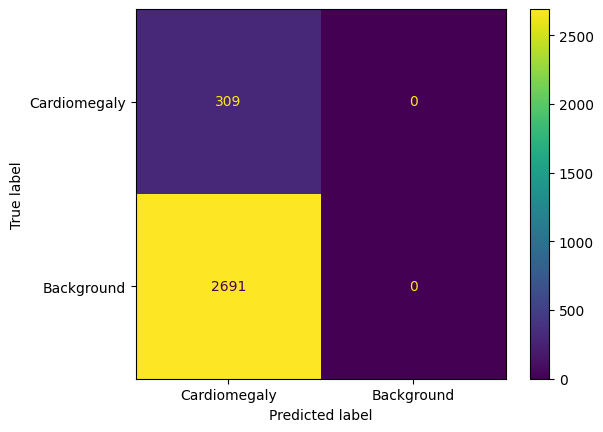

              precision    recall  f1-score   support

Cardiomegaly       0.10      1.00      0.19       309
  Background       0.00      0.00      0.00      2691

    accuracy                           0.10      3000
   macro avg       0.05      0.50      0.09      3000
weighted avg       0.01      0.10      0.02      3000



c:\Users\engli\Documents\School Stuff\Y2S1\NPSC2001\Mini_VinDr_CXR_Dataset\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\engli\Documents\School Stuff\Y2S1\NPSC2001\Mini_VinDr_CXR_Dataset\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\engli\Documents\School Stuff\Y2S1\NPSC2001\Mini_VinDr_CXR_Dataset\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. U

In [110]:
disp = ConfusionMatrixDisplay(confusion_matrix(groundTruth["class_name"], df["class_name"], labels = ["Cardiomegaly", "Background"]), display_labels=["Cardiomegaly", "Background"])
disp.plot()
plt.show()
print(classification_report(groundTruth["class_name"], df["class_name"], labels = ["Cardiomegaly", "Background"]))

In [116]:
#takes in a dataframe of results with confidence interval scores, and then filters by threshold
def filterDf(dataframe: pd.DataFrame, threshold: float):
    filteredDf = dataframe.copy(deep = True)
    filteredDf.loc[df["conf"] < threshold, "class_name"] = "Background"
    return filteredDf

def getMetrics(groundTruth: pd.DataFrame, predicted: pd.DataFrame):
    disp = ConfusionMatrixDisplay(confusion_matrix(groundTruth["class_name"], predicted["class_name"], labels = ["Cardiomegaly", "Background"]), display_labels=["Cardiomegaly", "Background"])
    disp.plot()
    plt.show()
    print(classification_report(groundTruth["class_name"], predicted["class_name"], labels = ["Cardiomegaly", "Background"]))

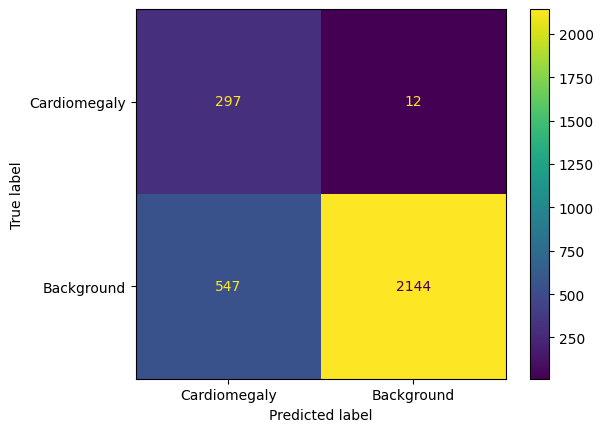

              precision    recall  f1-score   support

Cardiomegaly       0.35      0.96      0.52       309
  Background       0.99      0.80      0.88      2691

    accuracy                           0.81      3000
   macro avg       0.67      0.88      0.70      3000
weighted avg       0.93      0.81      0.85      3000



In [117]:
df_01 = filterDf(df, 0.01)
getMetrics(groundTruth, df_01)

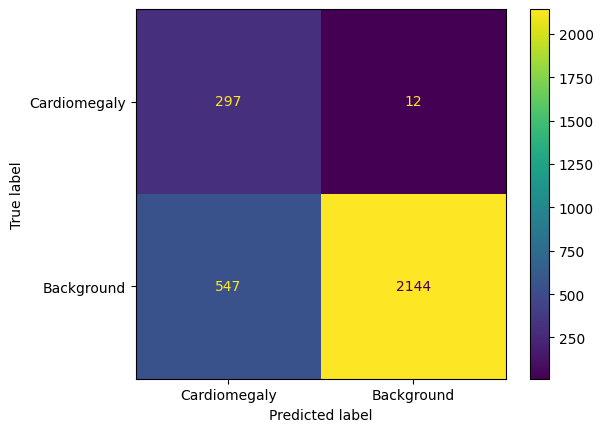

              precision    recall  f1-score   support

Cardiomegaly       0.35      0.96      0.52       309
  Background       0.99      0.80      0.88      2691

    accuracy                           0.81      3000
   macro avg       0.67      0.88      0.70      3000
weighted avg       0.93      0.81      0.85      3000



In [118]:
df_001 = filterDf(df, 0.001)
getMetrics(groundTruth, df_001)

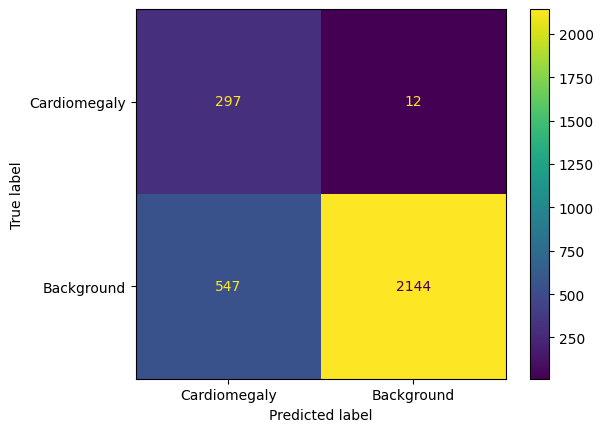

              precision    recall  f1-score   support

Cardiomegaly       0.35      0.96      0.52       309
  Background       0.99      0.80      0.88      2691

    accuracy                           0.81      3000
   macro avg       0.67      0.88      0.70      3000
weighted avg       0.93      0.81      0.85      3000



In [119]:
df_0001 = filterDf(df, 0.0001)
getMetrics(groundTruth, df_0001)